# Setup and Installations

In [12]:
import os
import sys

import gymnasium as gym
from stable_baselines3.dqn.dqn import DQN
print("SUMO_HOME:", os.environ.get("SUMO_HOME"))

SUMO_HOME: /opt/homebrew/opt/sumo/share/sumo


# Environment Setup

In [13]:
if "SUMO_HOME" in os.environ:
    tools = os.path.join(os.environ["SUMO_HOME"], "tools")
    sys.path.append(tools)
else:
    sys.exit("Please declare the environment variable 'SUMO_HOME'")

import traci
from sumo_rl import SumoEnvironment

# Training the DQN Agent

# Setup Timestamp for Training

In [14]:
from datetime import datetime
import pytz

jerusalem_tz = pytz.timezone('Asia/Jerusalem')

jerusalem_time = datetime.now(jerusalem_tz)

# Format the timestamp
timestamp = jerusalem_time.strftime("%Y%m%d_%H%M%S")

In [4]:
# Before running the code, make sure to start the SUMO server by running the following command in the terminal:
# sumo-gui -c /Users/eviat/Desktop/SUMO/sumo_rl/nets/single-intersection/single-intersection.sumocfg --remote-port 65533


^C


In [28]:
import matplotlib.pyplot as plt
import time
from sumo_rl import SumoEnvironment
from stable_baselines3 import DQN
import traci
import imageio

if __name__ == "__main__":
    print("Connecting to SUMO server...")
    traci_connection = traci.connect(port=65533)
    print("Connected to SUMO server")

    env = SumoEnvironment(
        net_file="/Users/eviat/Desktop/SUMO/sumo_rl/nets/single-intersection/single-intersection.net.xml",
        route_file="/Users/eviat/Desktop/SUMO/sumo_rl/nets/single-intersection/single-intersection.rou.xml",
        out_csv_name = f"/Users/eviat/Desktop/SUMO/outputs/single-intersection/dqn_{timestamp}.csv",
        single_agent=True,
        use_gui=False,
        num_seconds=3600,
    )
    print("SUMO environment created")

    model = DQN(
        env=env,
        policy="MlpPolicy",
        learning_rate=0.001,
        learning_starts=0,
        train_freq=1,
        target_update_interval=1,
        exploration_initial_eps=0.05,
        exploration_final_eps=0.01,
        verbose=2,
    )
    print("Starting training")
    episode_num = 15
    model.learn(total_timesteps=episode_num*3600)
    print("Training completed")

    # Save the model
    model.save(f'/Users/eviat/Desktop/SUMO/savedAgent/single-intersection/dqn{timestamp}')
    print("Model saved")

    # Close the TraCI connection
    traci_connection.close()
    print("TraCI connection closed")


Connecting to SUMO server...
Connected to SUMO server
 Retrying in 1 seconds
Step #0.00 (0ms ?*RT. ?UPS, TraCI: 4ms, vehicles TOT 0 ACT 0 BUF 0)                      
SUMO environment created
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Starting training
 Retrying in 1 seconds
Step #3600.00 (0ms ?*RT. ?UPS, TraCI: 6ms, vehicles TOT 2523 ACT 21 BUF 0)                
 Retrying in 1 seconds
Step #3600.00 (0ms ?*RT. ?UPS, TraCI: 9ms, vehicles TOT 2565 ACT 25 BUF 0)                
 Retrying in 1 seconds
Step #3600.00 (0ms ?*RT. ?UPS, TraCI: 12ms, vehicles TOT 2574 ACT 32 BUF 0)               
 Retrying in 1 seconds
Step #3600.00 (0ms ?*RT. ?UPS, TraCI: 8ms, vehicles TOT 2493 ACT 27 BUF 0)                
 Retrying in 1 seconds
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 720      |
|    ep_rew_mean      | -0.208   |
|    exploration_rate | 0.0287   |
| time/               |          |
|    ep

/Users/eviat/Desktop/אישי/תואר מדמח/שנה ג׳/מבוא לבינה/מטלה 1/POC/venv/lib/python3.9/site-packages/stable_baselines3/common/save_util.py:284: UserWarning: Path '/Users/eviat/Desktop/SUMO/savedAgent/single-intersection' does not exist. Will create it.
  warnings.warn(f"Path '{path.parent}' does not exist. Will create it.")


FatalTraCIError: Connection closed by SUMO.

Connecting to SUMO server...
Connected to SUMO server
 Retrying in 1 seconds
Step #0.00 (0ms ?*RT. ?UPS, TraCI: 6ms, vehicles TOT 0 ACT 0 BUF 0)                      
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds


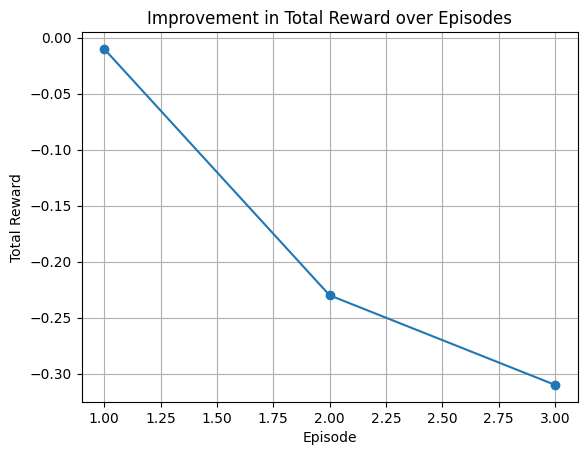

FatalTraCIError: Connection closed by SUMO.

In [36]:
def capture_screenshot(output_path, episode, step):
    file_name = f"episode_{episode}_step_{step}.png"
    file_path = os.path.join(output_path, file_name)
    traci.gui.screenshot(traci.gui.DEFAULT_VIEW, file_path)

def train_and_predict(env, model, episodes, save_path):
    if not os.path.exists(save_path):
        os.makedirs(save_path)

    rewards_per_episode = []  # List to store rewards for each episode

    for episode in range(episodes):
        obs, info = env.reset()
        done = False
        step = 0
        total_reward = 0  # Variable to store total reward for the episode
        while step < 3600:
            action, _states = model.predict(obs)
            results = env.step(action)
            if len(results) == 5:
                obs, rewards, done, _, info = results
                if done:
                    print(f"DONE: {done}")
            else:
                raise ValueError(f"Expected 5 values from env.step(), got {len(results)}")
            total_reward += rewards  # Accumulate rewards
            # Capture and save the environment state every 10 steps
            # if step % 10 == 0:
            #     capture_screenshot(save_path, episode, step)
            step += 1
        rewards_per_episode.append(total_reward)  # Append total reward for this episode

    model.save('/Users/eviat/Desktop/SUMO/savedAgent/single-intersection/dqn20240604_165649.zip')

    # Plot the rewards
    plt.plot(range(1, episodes + 1), rewards_per_episode, marker='o')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Improvement in Total Reward over Episodes')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    print("Connecting to SUMO server...")
    traci_connection_predict = traci.connect(port=65533)
    print("Connected to SUMO server")

    env = SumoEnvironment(
        net_file="/Users/eviat/Desktop/SUMO/sumo_rl/nets/single-intersection/single-intersection.net.xml",
        route_file="/Users/eviat/Desktop/SUMO/sumo_rl/nets/single-intersection/single-intersection.rou.xml",
        out_csv_name = f"/Users/eviat/Desktop/SUMO/outputs/single-intersection/dqn_{timestamp}.csv",
        single_agent=True,
        use_gui=True,
        num_seconds=3600,
    )

    # Load the trained model
    loaded_model = DQN.load('/Users/eviat/Desktop/SUMO/outputs/single-intersection/dqn20240604_165649.zip')
    train_and_predict(env=env, model=loaded_model, episodes=3, save_path='/Users/eviat/Desktop/SUMO/outputs/single-intersection/dqn_images')
    traci_connection_predict.close()

In [26]:
import os
import imageio.v2 as imageio
from IPython.display import Video, display
import cv2
import numpy as np

def create_video(output_path, title):
    images = []
    print(f"Listing files in directory: {output_path}")
    for file_name in reversed(sorted(os.listdir(output_path))):
        if file_name.endswith(".png"):
            file_path = os.path.join(output_path, file_name)
            print(f"Reading image file: {file_path}")
            try:
                image = imageio.imread(file_path)
                images.append(image)
            except Exception as e:
                print(f"Error reading {file_path}: {e}")

    if not images:
        raise ValueError("No PNG images found in the specified directory.")

    # Check if all images have the same shape
    first_image_shape = images[0].shape
    for image in images:
        if image.shape != first_image_shape:
            raise ValueError("Not all images have the same shape. Ensure all images have the same dimensions.")

    # Convert images to a format compatible with OpenCV
    height, width, layers = first_image_shape
    video_path = os.path.join(output_path, f"{title}.mp4")

    try:
        # Define the codec and create VideoWriter object
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        video = cv2.VideoWriter(video_path, fourcc, 10, (width, height))

        for image in images:
            # Convert RGB (imageio default) to BGR (OpenCV default)
            image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            video.write(image_bgr)

        video.release()
        print(f"Video successfully saved to: {video_path}")
    except Exception as e:
        print(f"Error saving video: {e}")
        raise

    # Check if the video file was created
    if not os.path.exists(video_path):
        raise FileNotFoundError(f"The video file {video_path} was not created.")

    return video_path

# Call the function with the correct path
output_path = "/Users/eviat/Desktop/SUMO/outputs/single-intersection/dqn_images"
title = "DQN_Agent_Solution"
video_path = create_video(output_path, title)

# Check the video path
print(f"Video path: {video_path}")

# Display the video
video = Video(video_path)

Listing files in directory: /Users/eviat/Desktop/SUMO/outputs/single-intersection/dqn_images
Reading image file: /Users/eviat/Desktop/SUMO/outputs/single-intersection/dqn_images/episode_2_step_990.png
Reading image file: /Users/eviat/Desktop/SUMO/outputs/single-intersection/dqn_images/episode_2_step_980.png
Reading image file: /Users/eviat/Desktop/SUMO/outputs/single-intersection/dqn_images/episode_2_step_970.png
Reading image file: /Users/eviat/Desktop/SUMO/outputs/single-intersection/dqn_images/episode_2_step_960.png
Reading image file: /Users/eviat/Desktop/SUMO/outputs/single-intersection/dqn_images/episode_2_step_950.png
Reading image file: /Users/eviat/Desktop/SUMO/outputs/single-intersection/dqn_images/episode_2_step_940.png
Reading image file: /Users/eviat/Desktop/SUMO/outputs/single-intersection/dqn_images/episode_2_step_930.png
Reading image file: /Users/eviat/Desktop/SUMO/outputs/single-intersection/dqn_images/episode_2_step_920.png
Reading image file: /Users/eviat/Desktop/SU

In [16]:
if __name__ == "__main__":
    print("Connecting to SUMO server...")
    traci_connection = traci.connect(port=65533)
    print("Connected to SUMO server")

    env = SumoEnvironment(
        net_file="/Users/md/Desktop/sumo-rl/nets/single-intersection/single-intersection.net.xml",
        route_file="/Users/md/Desktop/sumo-rl/nets/single-intersection/single-intersection.rou.xml",
        out_csv_name="outputs/2way-single-intersection/dqn",
        single_agent=True,
        use_gui=True,
        num_seconds=3600,
    )
    print("SUMO environment created")

    model = DQN(
        env=env,
        policy="MlpPolicy",
        learning_rate=0.001,
        learning_starts=0,
        train_freq=1,
        target_update_interval=1,
        exploration_initial_eps=0.05,
        exploration_final_eps=0.01,
        verbose=2,
    )
    print("Starting training")
    model.learn(total_timesteps=3600)
    print("Training completed")
    model.save('savedAgent/2way-single-intersection/dqn')
    print("Model saved")

    # Close the TraCI connection
    traci_connection.close()
    print("TraCI connection closed")


Connecting to SUMO server...
Connected to SUMO server
 Retrying in 1 seconds
Step #0.00 (0ms ?*RT. ?UPS, TraCI: 5ms, vehicles TOT 0 ACT 0 BUF 0)                      
SUMO environment created
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Starting training
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 720      |
|    ep_rew_mean      | -1.44    |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4        |
|    fps              | 69       |
|    time_elapsed     | 41       |
|    total_timesteps  | 2880     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 1.9      |
|    n_updates        | 2879     |
----------------------------------
 Retrying in 1 seconds
Training completed
Model saved


KeyboardInterrupt: 

# Running the Naive Fixed-Time Solution

Connecting to SUMO server...
Connected to SUMO server
 Retrying in 1 seconds
Step #0.00 (0ms ?*RT. ?UPS, TraCI: 2ms, vehicles TOT 0 ACT 0 BUF 0)                      
SUMO environment created
 Retrying in 1 seconds


KeyboardInterrupt: 

# Visualizing and Analyzing the Results

Columns in the CSV: Index(['step', 'system_total_stopped', 'system_total_waiting_time',
       'system_mean_waiting_time', 'system_mean_speed', 't_stopped',
       't_accumulated_waiting_time', 't_average_speed', 'agents_total_stopped',
       'agents_total_accumulated_waiting_time'],
      dtype='object')


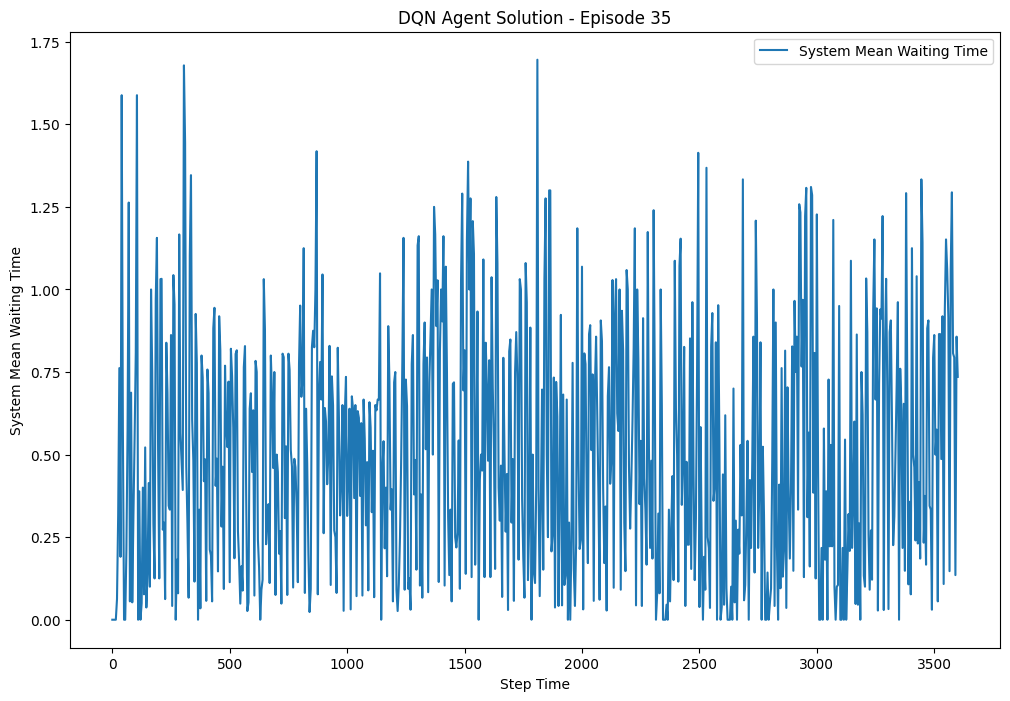

Columns in the CSV: Index(['step', 'system_total_stopped', 'system_total_waiting_time',
       'system_mean_waiting_time', 'system_mean_speed', 't_stopped',
       't_accumulated_waiting_time', 't_average_speed', 'agents_total_stopped',
       'agents_total_accumulated_waiting_time'],
      dtype='object')


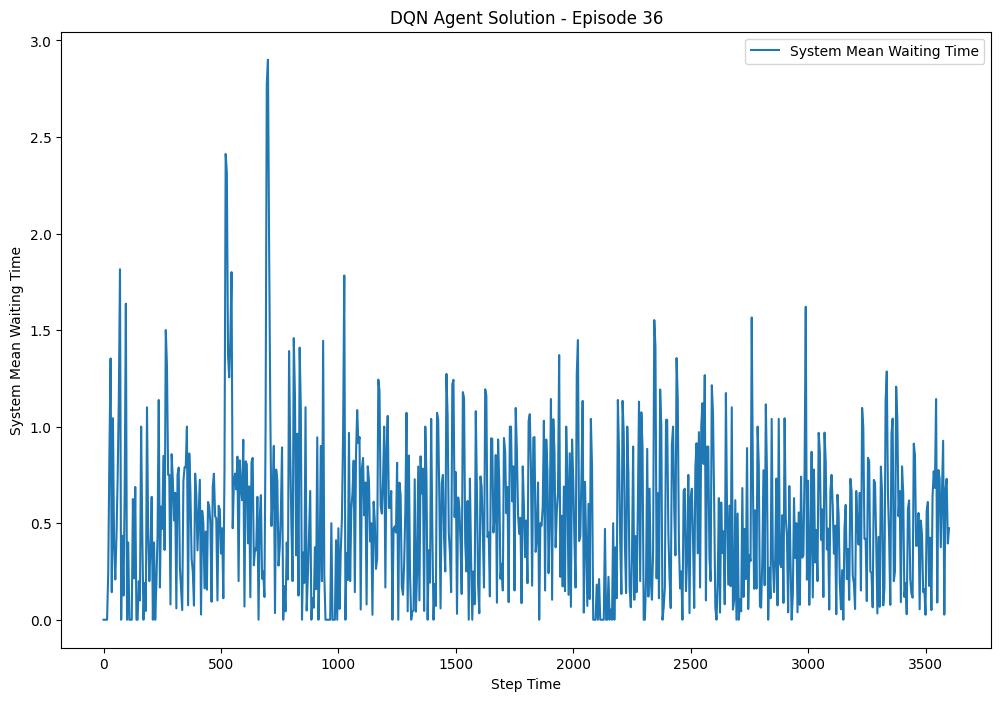

Columns in the CSV: Index(['step', 'system_total_stopped', 'system_total_waiting_time',
       'system_mean_waiting_time', 'system_mean_speed', 't_stopped',
       't_accumulated_waiting_time', 't_average_speed', 'agents_total_stopped',
       'agents_total_accumulated_waiting_time'],
      dtype='object')


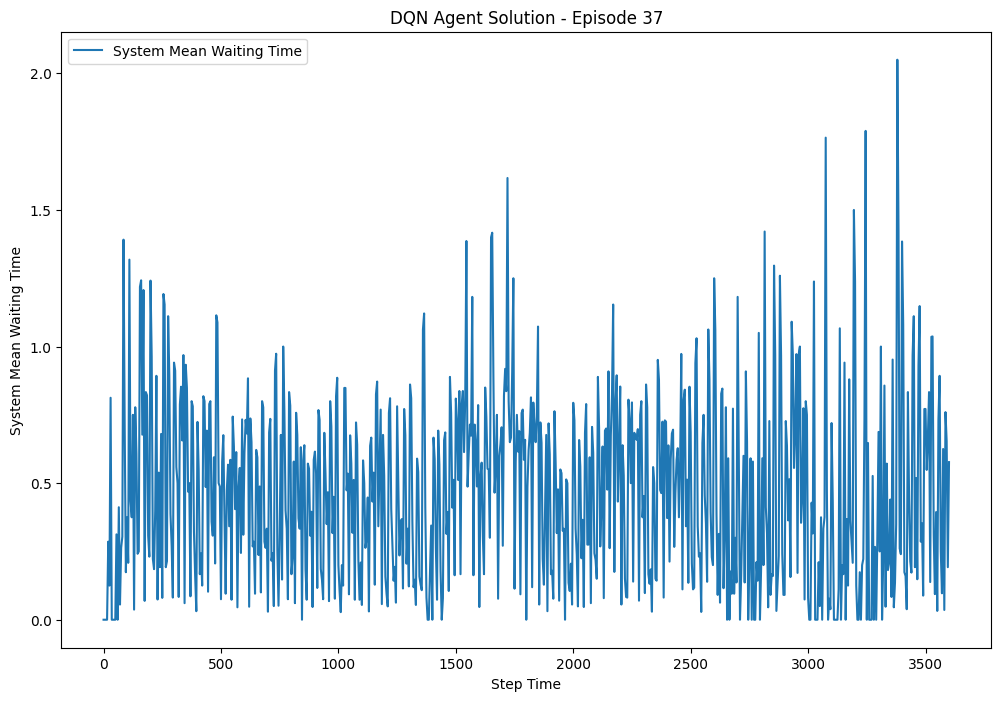

Columns in the CSV: Index(['step', 'system_total_stopped', 'system_total_waiting_time',
       'system_mean_waiting_time', 'system_mean_speed', 't_stopped',
       't_accumulated_waiting_time', 't_average_speed', 'agents_total_stopped',
       'agents_total_accumulated_waiting_time'],
      dtype='object')


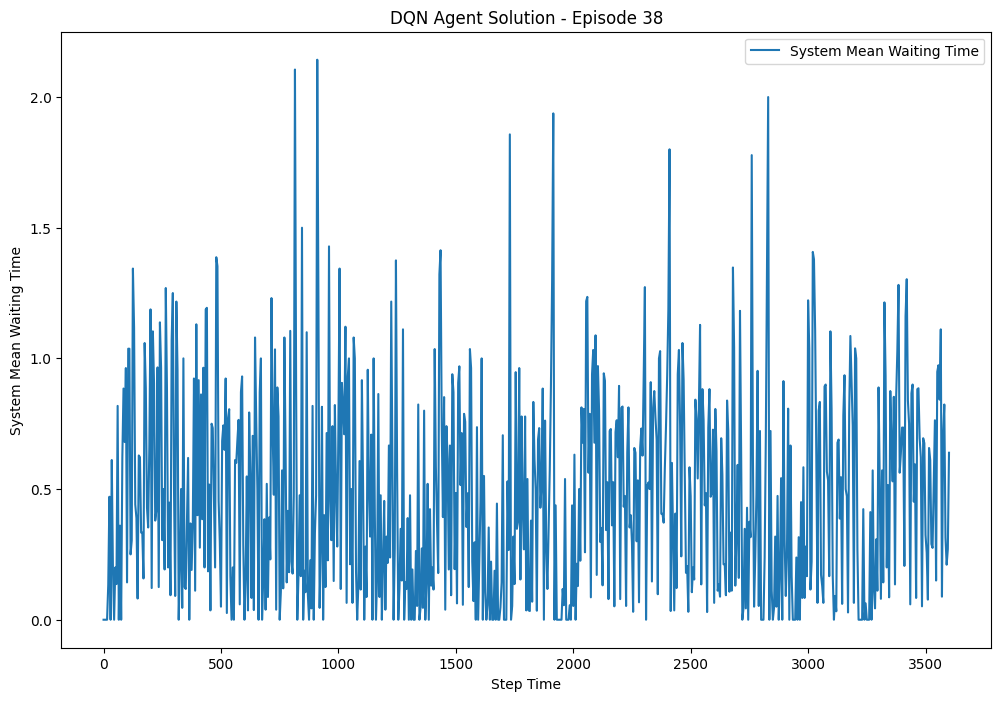

Columns in the CSV: Index(['step', 'system_total_stopped', 'system_total_waiting_time',
       'system_mean_waiting_time', 'system_mean_speed', 't_stopped',
       't_accumulated_waiting_time', 't_average_speed', 'agents_total_stopped',
       'agents_total_accumulated_waiting_time'],
      dtype='object')


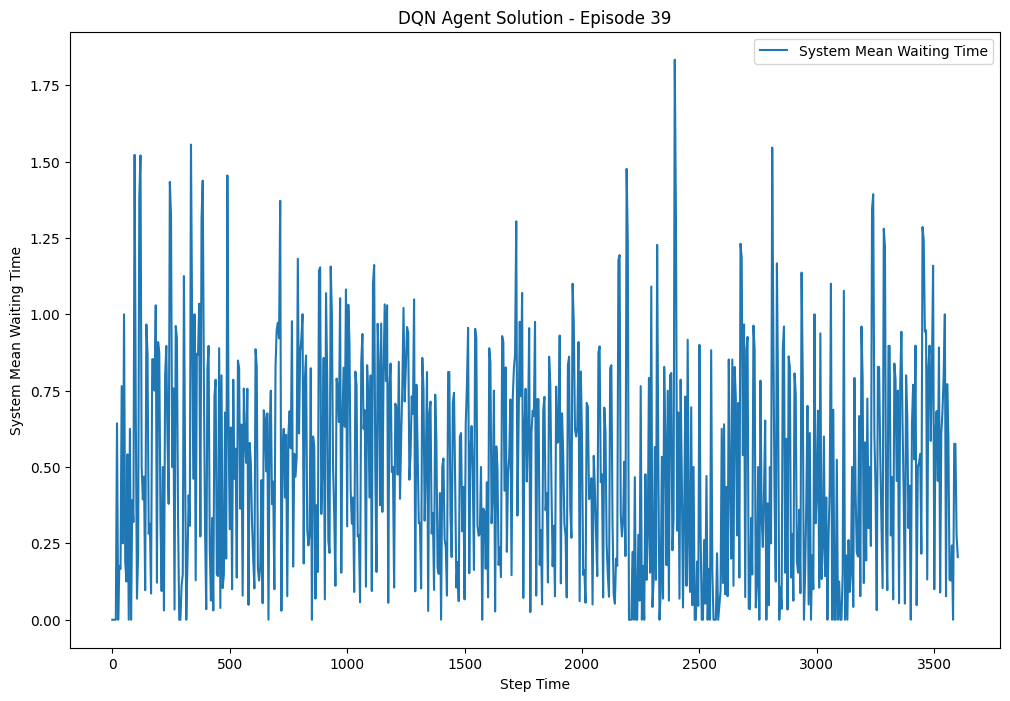

Columns in the CSV: Index(['step', 'system_total_stopped', 'system_total_waiting_time',
       'system_mean_waiting_time', 'system_mean_speed', 't_stopped',
       't_accumulated_waiting_time', 't_average_speed', 'agents_total_stopped',
       'agents_total_accumulated_waiting_time'],
      dtype='object')


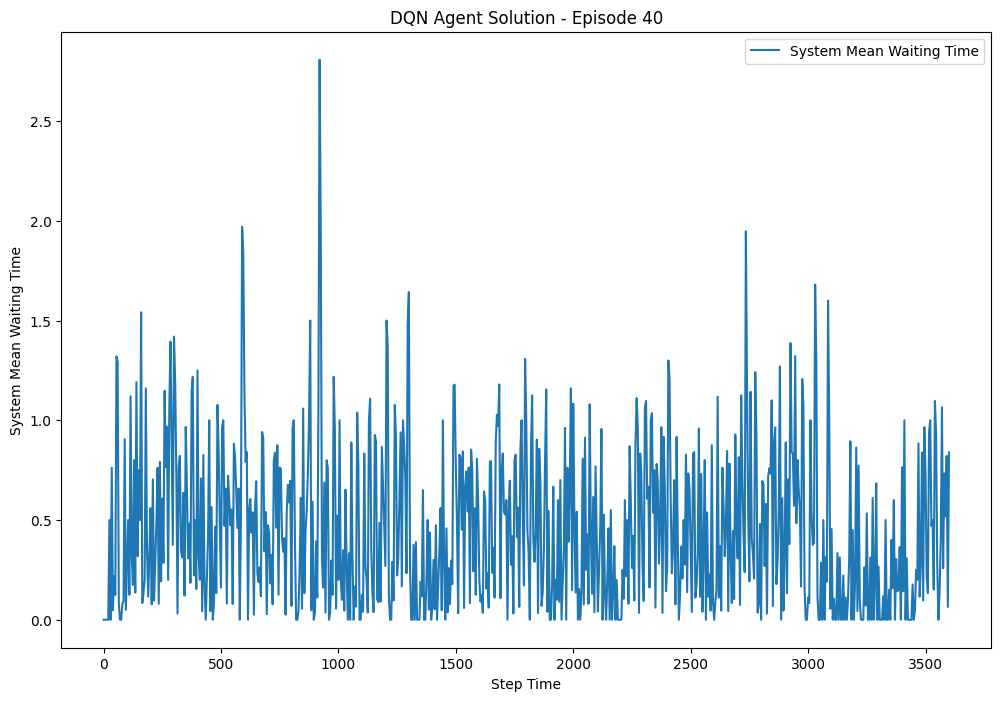

Columns in the CSV: Index(['step', 'system_total_stopped', 'system_total_waiting_time',
       'system_mean_waiting_time', 'system_mean_speed', 't_stopped',
       't_accumulated_waiting_time', 't_average_speed', 'agents_total_stopped',
       'agents_total_accumulated_waiting_time'],
      dtype='object')


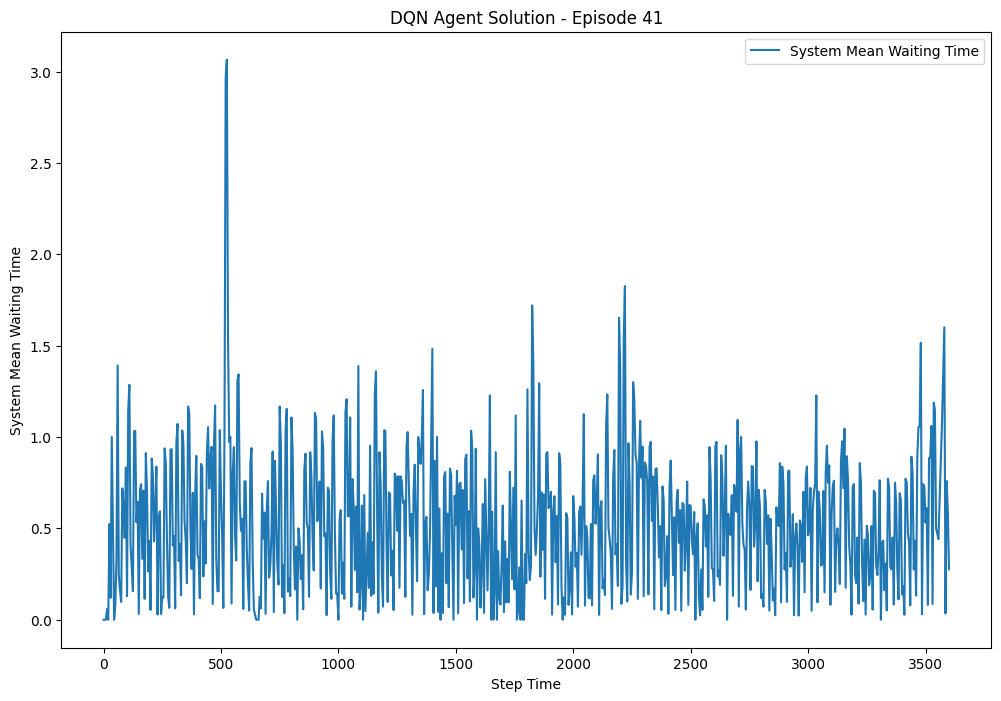

Columns in the CSV: Index(['step', 'system_total_stopped', 'system_total_waiting_time',
       'system_mean_waiting_time', 'system_mean_speed', 't_stopped',
       't_accumulated_waiting_time', 't_average_speed', 'agents_total_stopped',
       'agents_total_accumulated_waiting_time'],
      dtype='object')


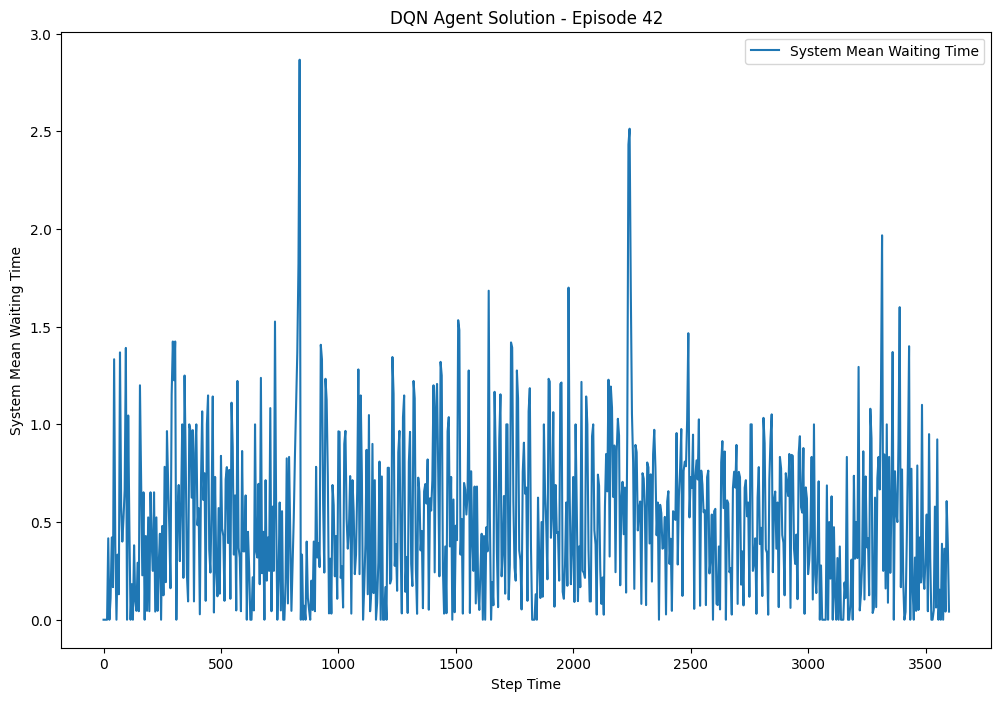

Columns in the CSV: Index(['step', 'system_total_stopped', 'system_total_waiting_time',
       'system_mean_waiting_time', 'system_mean_speed', 't_stopped',
       't_accumulated_waiting_time', 't_average_speed', 'agents_total_stopped',
       'agents_total_accumulated_waiting_time'],
      dtype='object')


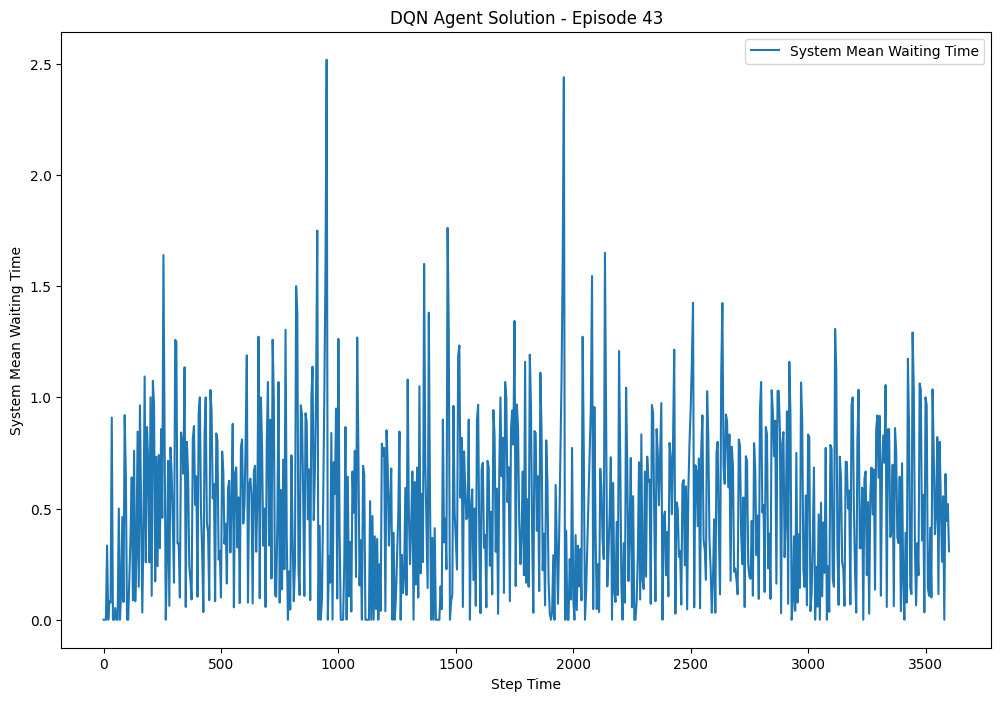

Columns in the CSV: Index(['step', 'system_total_stopped', 'system_total_waiting_time',
       'system_mean_waiting_time', 'system_mean_speed', 't_stopped',
       't_accumulated_waiting_time', 't_average_speed', 'agents_total_stopped',
       'agents_total_accumulated_waiting_time'],
      dtype='object')


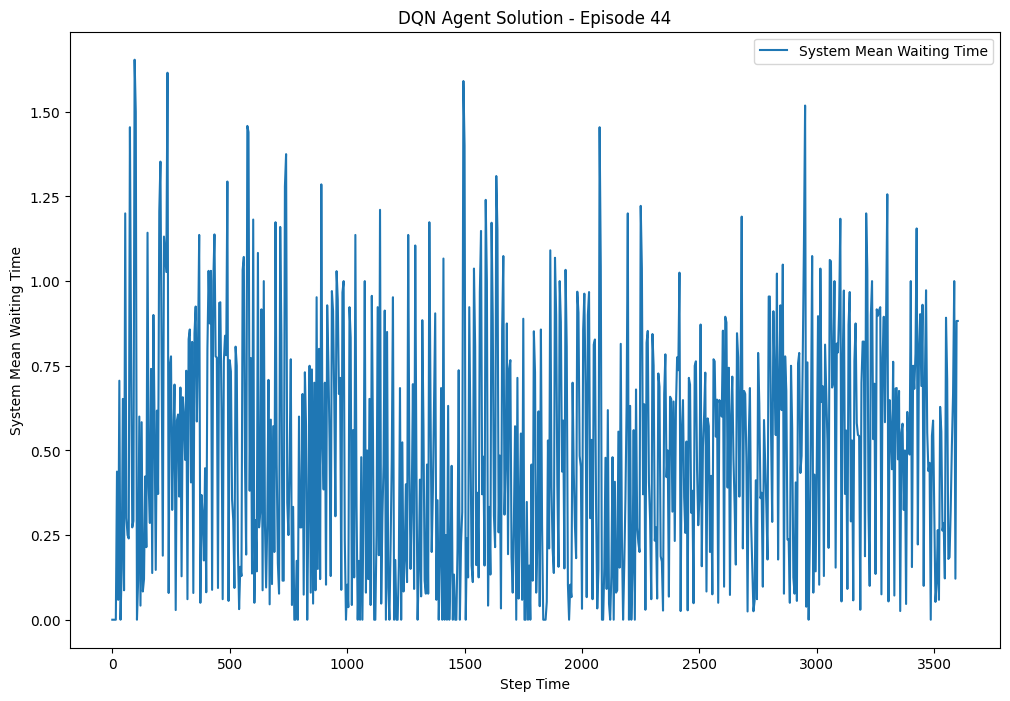

Columns in the CSV: Index(['step', 'system_total_stopped', 'system_total_waiting_time',
       'system_mean_waiting_time', 'system_mean_speed', 't_stopped',
       't_accumulated_waiting_time', 't_average_speed', 'agents_total_stopped',
       'agents_total_accumulated_waiting_time'],
      dtype='object')


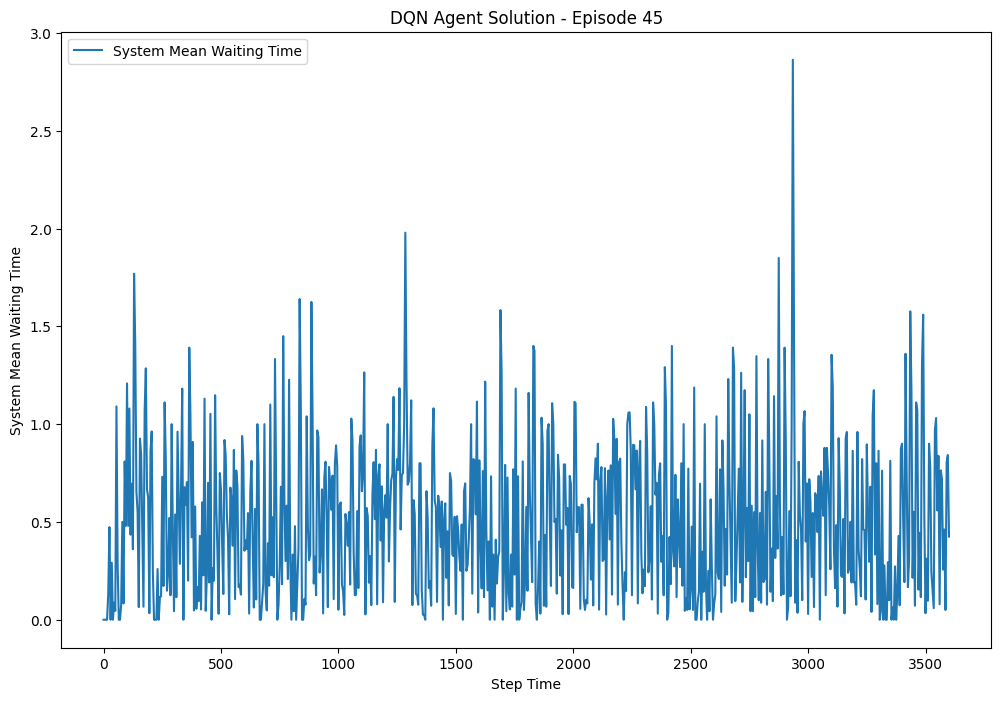

Columns in the CSV: Index(['step', 'system_total_stopped', 'system_total_waiting_time',
       'system_mean_waiting_time', 'system_mean_speed', 't_stopped',
       't_accumulated_waiting_time', 't_average_speed', 'agents_total_stopped',
       'agents_total_accumulated_waiting_time'],
      dtype='object')


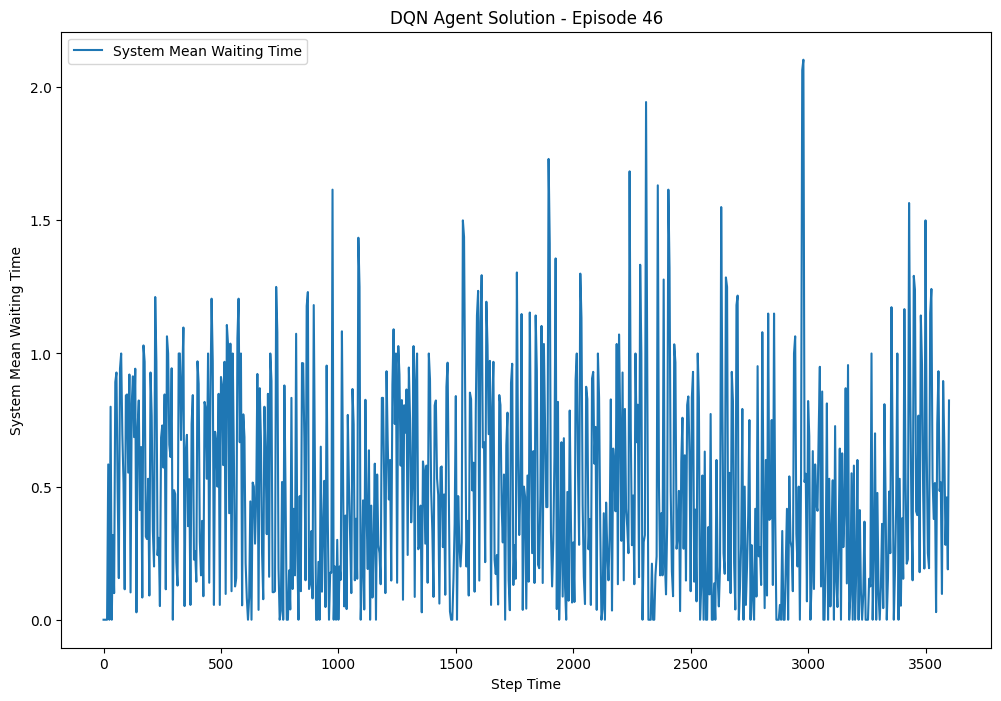

Columns in the CSV: Index(['step', 'system_total_stopped', 'system_total_waiting_time',
       'system_mean_waiting_time', 'system_mean_speed', 't_stopped',
       't_accumulated_waiting_time', 't_average_speed', 'agents_total_stopped',
       'agents_total_accumulated_waiting_time'],
      dtype='object')


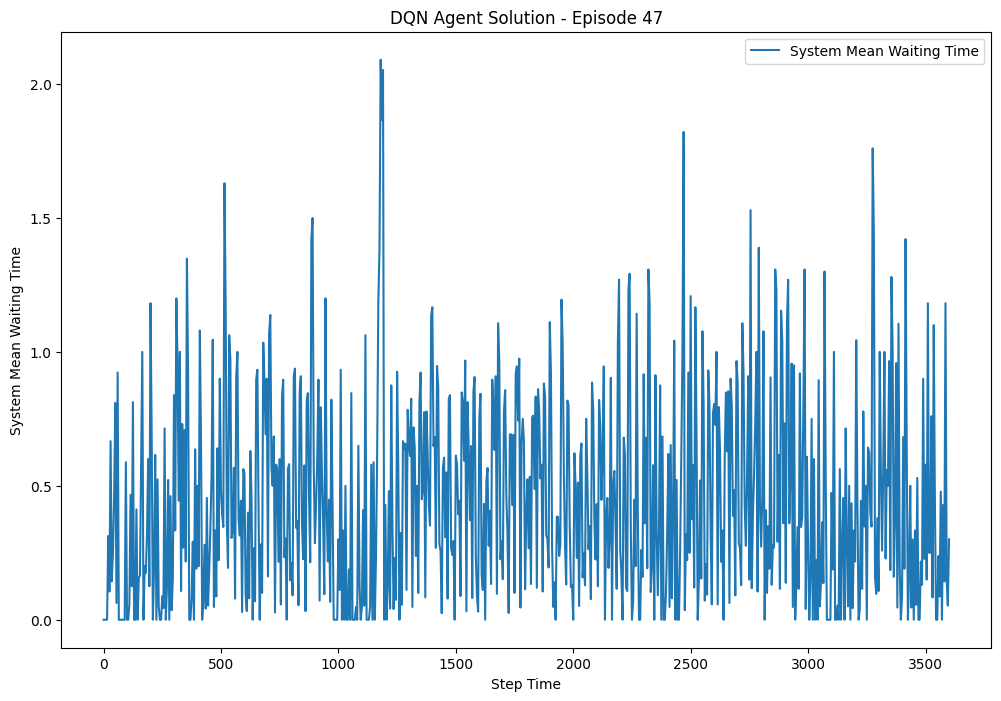

Columns in the CSV: Index(['step', 'system_total_stopped', 'system_total_waiting_time',
       'system_mean_waiting_time', 'system_mean_speed', 't_stopped',
       't_accumulated_waiting_time', 't_average_speed', 'agents_total_stopped',
       'agents_total_accumulated_waiting_time'],
      dtype='object')


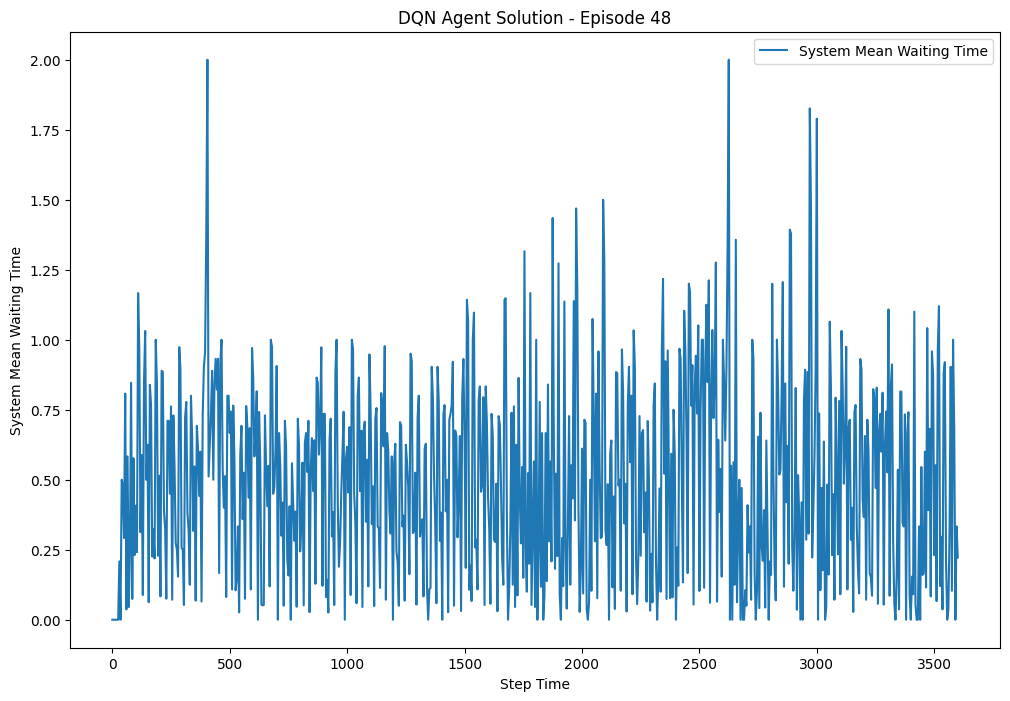

Columns in the CSV: Index(['step', 'system_total_stopped', 'system_total_waiting_time',
       'system_mean_waiting_time', 'system_mean_speed', 't_stopped',
       't_accumulated_waiting_time', 't_average_speed', 'agents_total_stopped',
       'agents_total_accumulated_waiting_time'],
      dtype='object')


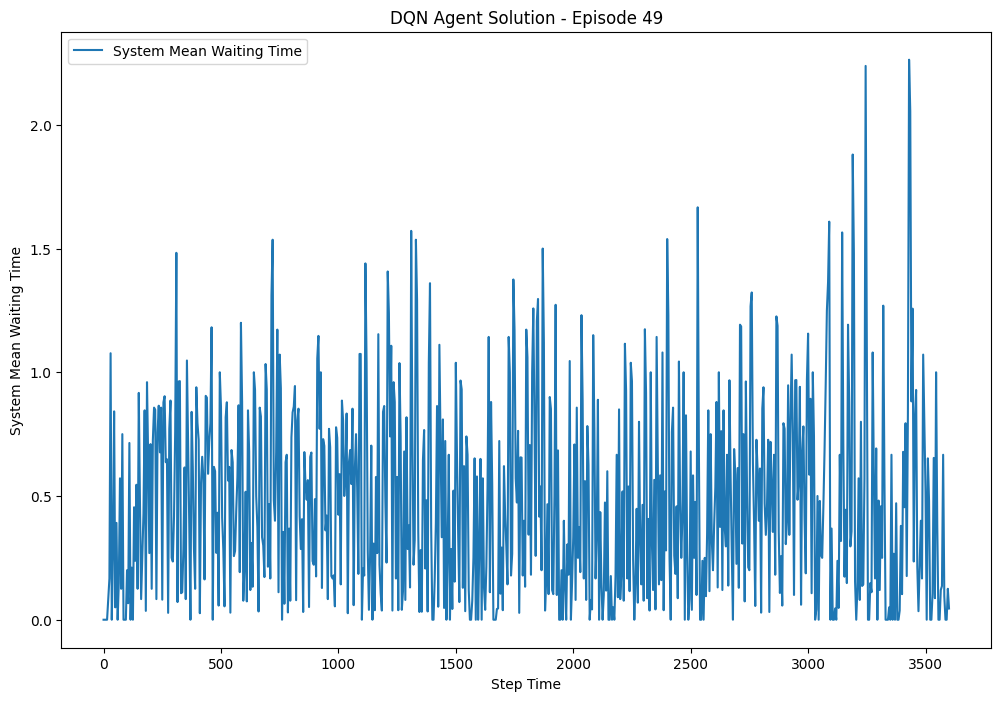

Columns in the CSV: Index(['step', 'system_total_stopped', 'system_total_waiting_time',
       'system_mean_waiting_time', 'system_mean_speed', 't_stopped',
       't_accumulated_waiting_time', 't_average_speed', 'agents_total_stopped',
       'agents_total_accumulated_waiting_time'],
      dtype='object')


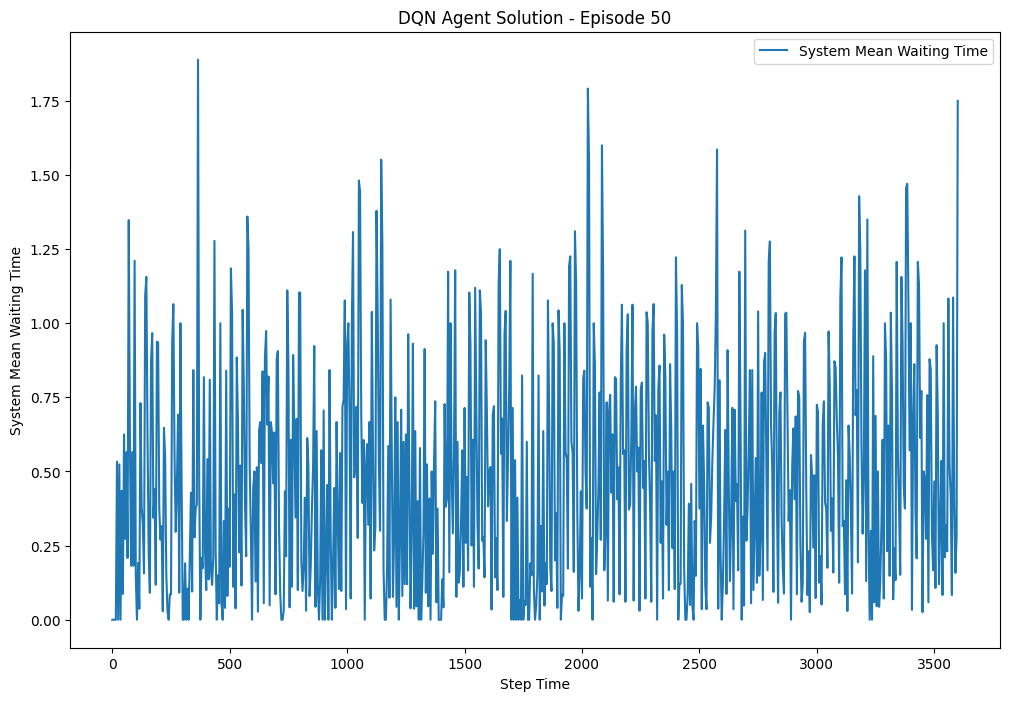

Columns in the CSV: Index(['step', 'system_total_stopped', 'system_total_waiting_time',
       'system_mean_waiting_time', 'system_mean_speed', 't_stopped',
       't_accumulated_waiting_time', 't_average_speed', 'agents_total_stopped',
       'agents_total_accumulated_waiting_time'],
      dtype='object')


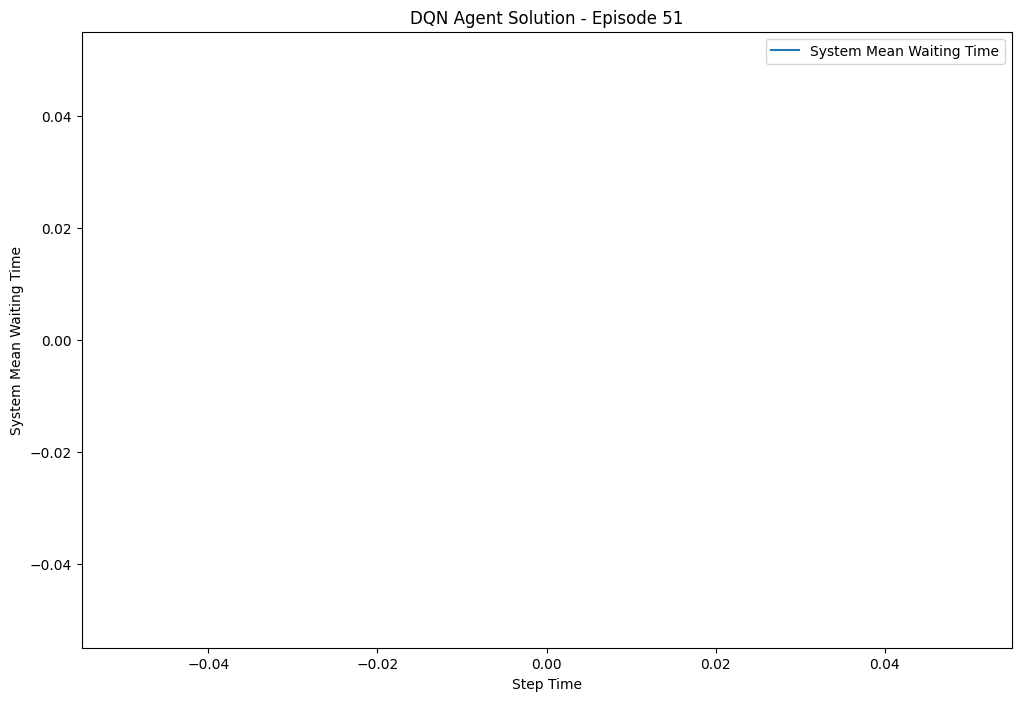

Columns in the CSV: Index(['step', 'system_total_stopped', 'system_total_waiting_time',
       'system_mean_waiting_time', 'system_mean_speed', 't_stopped',
       't_accumulated_waiting_time', 't_average_speed', 'agents_total_stopped',
       'agents_total_accumulated_waiting_time'],
      dtype='object')


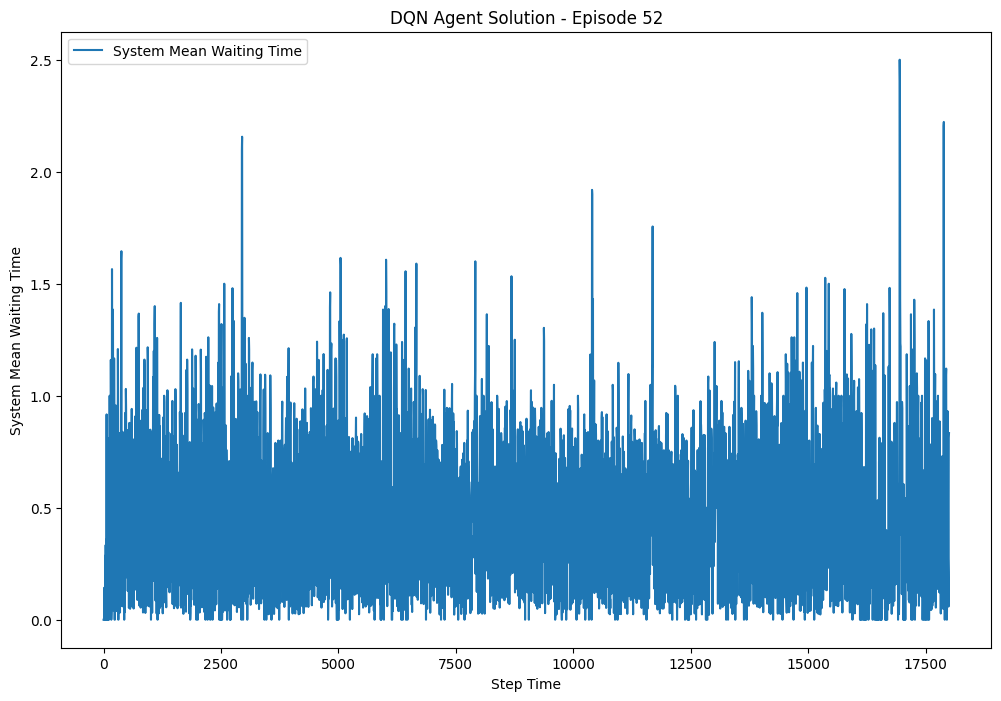

Columns in the CSV: Index(['step', 'system_total_stopped', 'system_total_waiting_time',
       'system_mean_waiting_time', 'system_mean_speed', 't_stopped',
       't_accumulated_waiting_time', 't_average_speed', 'agents_total_stopped',
       'agents_total_accumulated_waiting_time'],
      dtype='object')


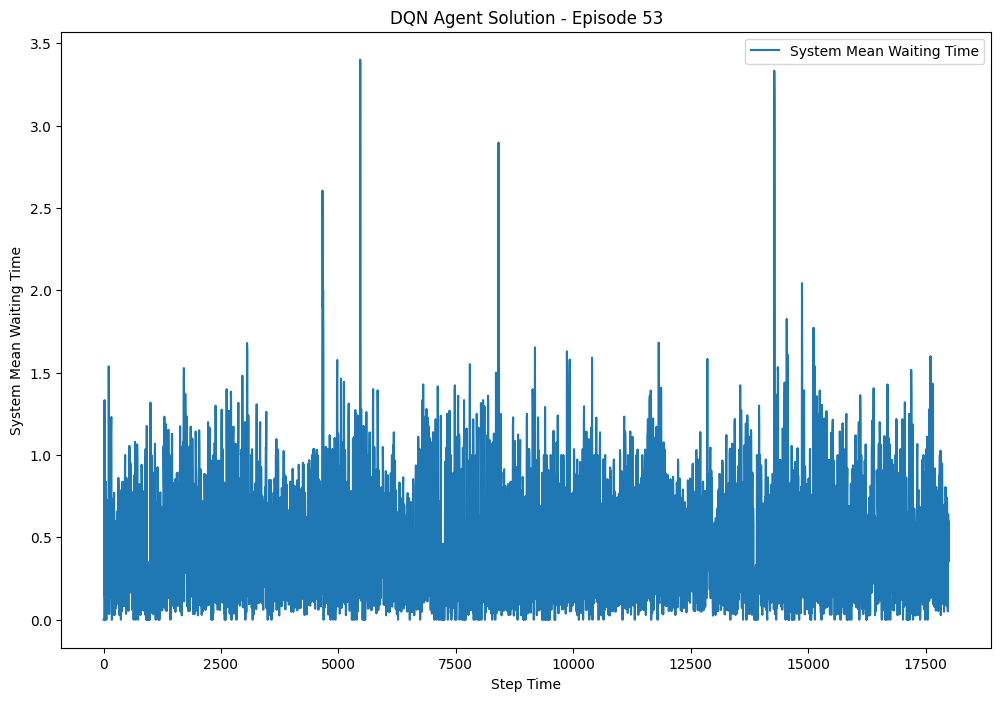

Columns in the CSV: Index(['step', 'system_total_stopped', 'system_total_waiting_time',
       'system_mean_waiting_time', 'system_mean_speed', 't_stopped',
       't_accumulated_waiting_time', 't_average_speed', 'agents_total_stopped',
       'agents_total_accumulated_waiting_time'],
      dtype='object')


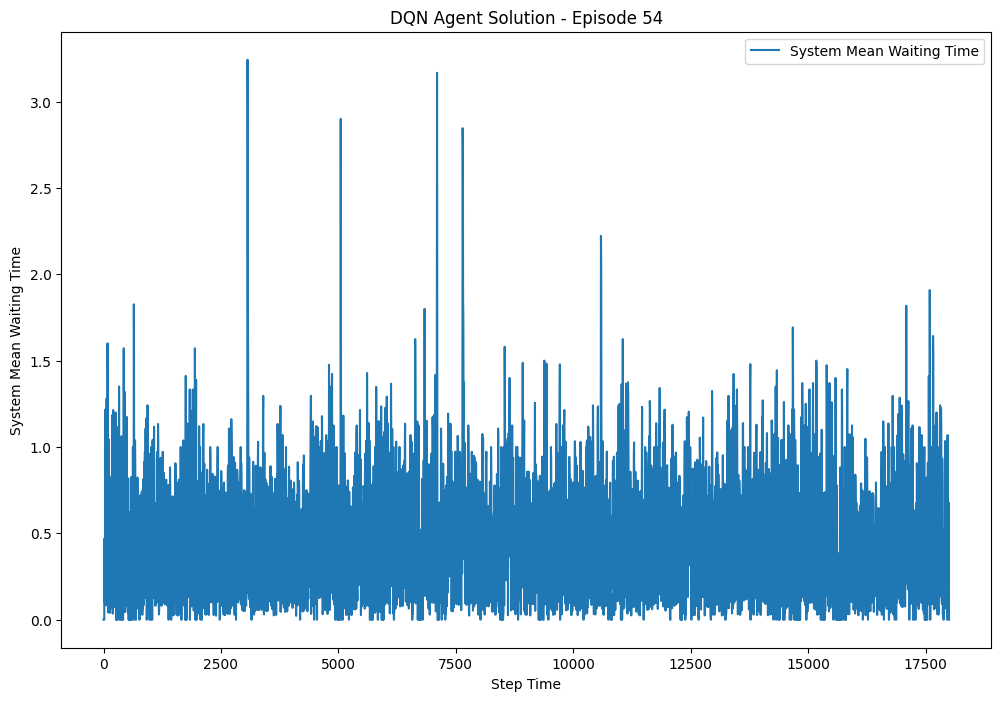

Columns in the CSV: Index(['step', 'system_total_stopped', 'system_total_waiting_time',
       'system_mean_waiting_time', 'system_mean_speed', 't_stopped',
       't_accumulated_waiting_time', 't_average_speed', 'agents_total_stopped',
       'agents_total_accumulated_waiting_time'],
      dtype='object')


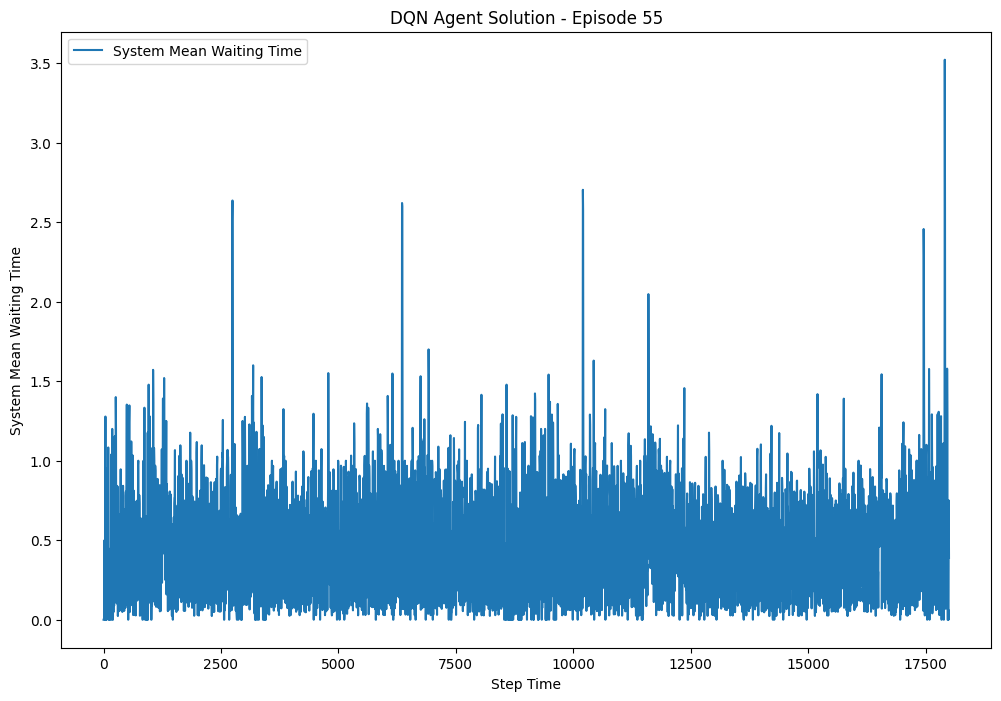

Columns in the CSV: Index(['step', 'system_total_stopped', 'system_total_waiting_time',
       'system_mean_waiting_time', 'system_mean_speed', 't_stopped',
       't_accumulated_waiting_time', 't_average_speed', 'agents_total_stopped',
       'agents_total_accumulated_waiting_time'],
      dtype='object')


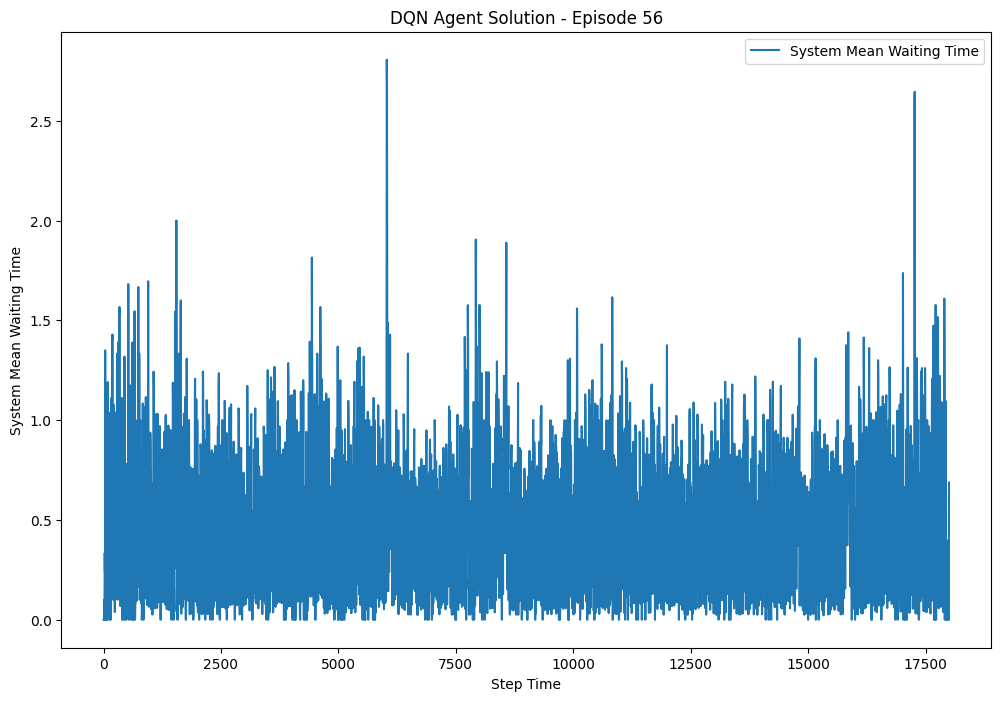

Columns in the CSV: Index(['step', 'system_total_stopped', 'system_total_waiting_time',
       'system_mean_waiting_time', 'system_mean_speed', 't_stopped',
       't_accumulated_waiting_time', 't_average_speed', 'agents_total_stopped',
       'agents_total_accumulated_waiting_time'],
      dtype='object')


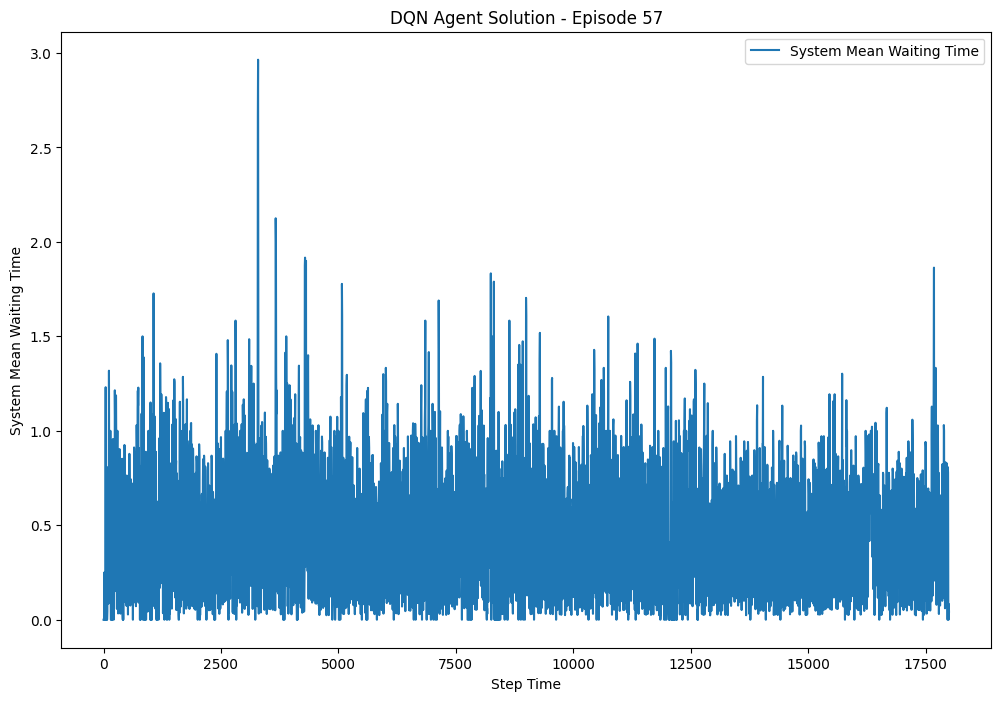

Columns in the CSV: Index(['step', 'system_total_stopped', 'system_total_waiting_time',
       'system_mean_waiting_time', 'system_mean_speed', 't_stopped',
       't_accumulated_waiting_time', 't_average_speed', 'agents_total_stopped',
       'agents_total_accumulated_waiting_time'],
      dtype='object')


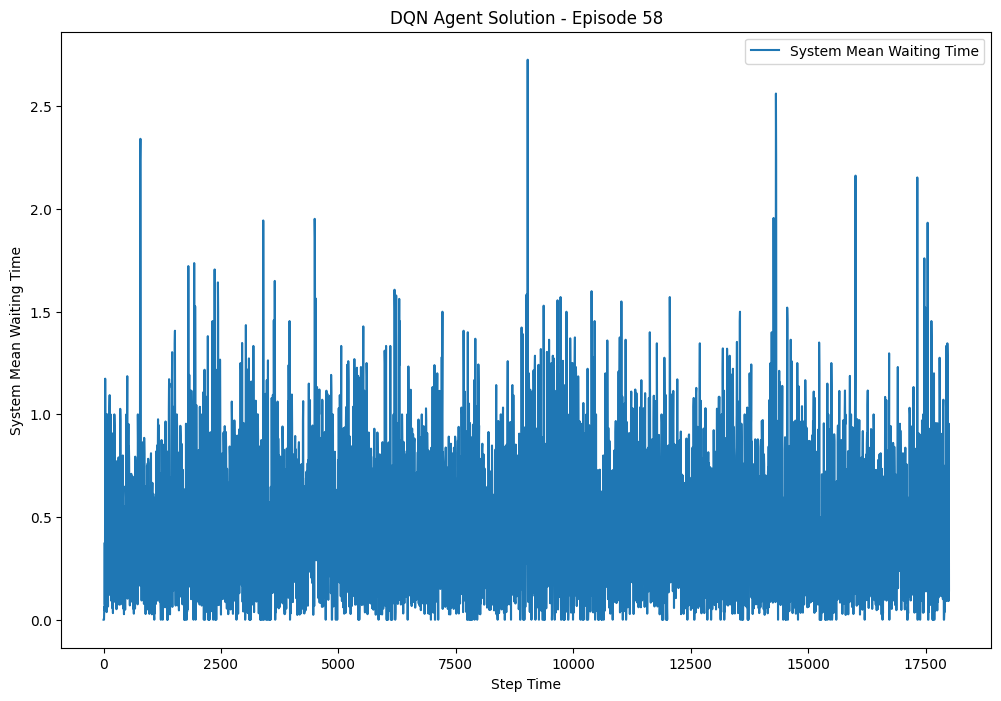

Columns in the CSV: Index(['step', 'system_total_stopped', 'system_total_waiting_time',
       'system_mean_waiting_time', 'system_mean_speed', 't_stopped',
       't_accumulated_waiting_time', 't_average_speed', 'agents_total_stopped',
       'agents_total_accumulated_waiting_time'],
      dtype='object')


Exception ignored in: <function SumoEnvironment.__del__ at 0x162aaeee0>
Traceback (most recent call last):
  File "/Users/eviat/Desktop/אישי/תואר מדמח/שנה ג׳/מבוא לבינה/מטלה 1/POC/venv/lib/python3.9/site-packages/sumo_rl/environment/env.py", line 460, in __del__
    self.close()
  File "/Users/eviat/Desktop/אישי/תואר מדמח/שנה ג׳/מבוא לבינה/מטלה 1/POC/venv/lib/python3.9/site-packages/sumo_rl/environment/env.py", line 450, in close
    traci.close()
  File "/Users/eviat/Desktop/אישי/תואר מדמח/שנה ג׳/מבוא לבינה/מטלה 1/POC/venv/lib/python3.9/site-packages/traci/main.py", line 262, in close
    connection.check().close(wait)
  File "/Users/eviat/Desktop/אישי/תואר מדמח/שנה ג׳/מבוא לבינה/מטלה 1/POC/venv/lib/python3.9/site-packages/traci/connection.py", line 396, in close
    self._sendCmd(tc.CMD_CLOSE, None, None)
  File "/Users/eviat/Desktop/אישי/תואר מדמח/שנה ג׳/מבוא לבינה/מטלה 1/POC/venv/lib/python3.9/site-packages/traci/connection.py", line 231, in _sendCmd
    return self._sendExact()
  

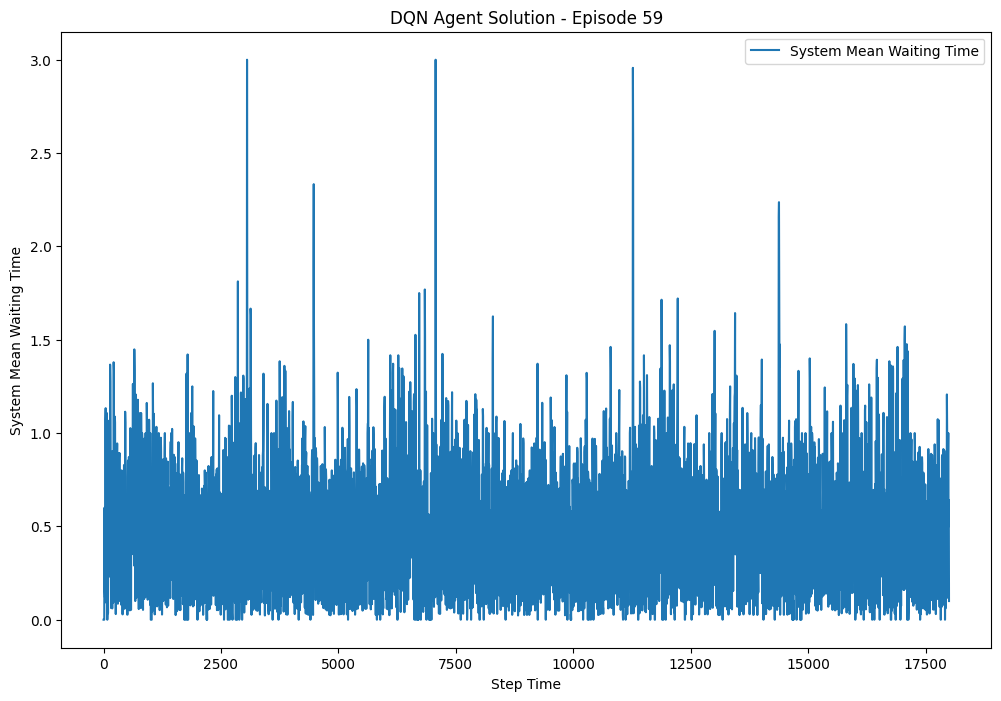

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_metrics(file_path, title):
    data = pd.read_csv(file_path)
    print("Columns in the CSV:", data.columns)
    
    if 'step' not in data.columns or 'system_mean_waiting_time' not in data.columns:
        raise KeyError("CSV file does not contain required columns: 'step' and 'system_mean_waiting_time'")
    
    plt.figure(figsize=(12, 8))
    plt.plot(data['step'], data['system_mean_waiting_time'], label='System Mean Waiting Time')
    plt.xlabel('Step Time')
    plt.ylabel('System Mean Waiting Time')
    plt.title(title)
    plt.legend()
    plt.show()

def visualize_results():
    for episode in range(35, 60):  # Assuming episodes are numbered from 1 to 24
        file_path = f"/Users/eviat/Desktop/SUMO/outputs/single-intersection/dqn_20240603_192928.csv_conn0_ep{episode}.csv"
        title = f"DQN Agent Solution - Episode {episode}"
        plot_metrics(file_path, title)

if __name__ == "__main__":
    visualize_results()


Columns in the CSV: Index(['step', 'system_total_stopped', 'system_total_waiting_time',
       'system_mean_waiting_time', 'system_mean_speed', 't_stopped',
       't_accumulated_waiting_time', 't_average_speed', 'agents_total_stopped',
       'agents_total_accumulated_waiting_time'],
      dtype='object')


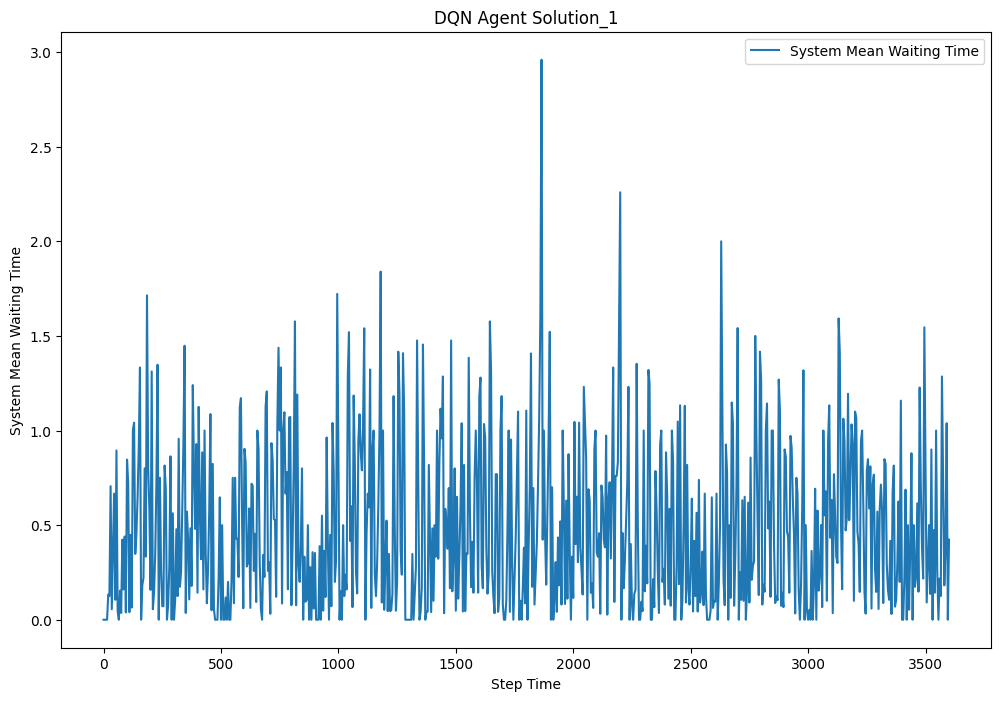

Columns in the CSV: Index(['step', 'system_total_stopped', 'system_total_waiting_time',
       'system_mean_waiting_time', 'system_mean_speed', 't_stopped',
       't_accumulated_waiting_time', 't_average_speed', 'agents_total_stopped',
       'agents_total_accumulated_waiting_time'],
      dtype='object')


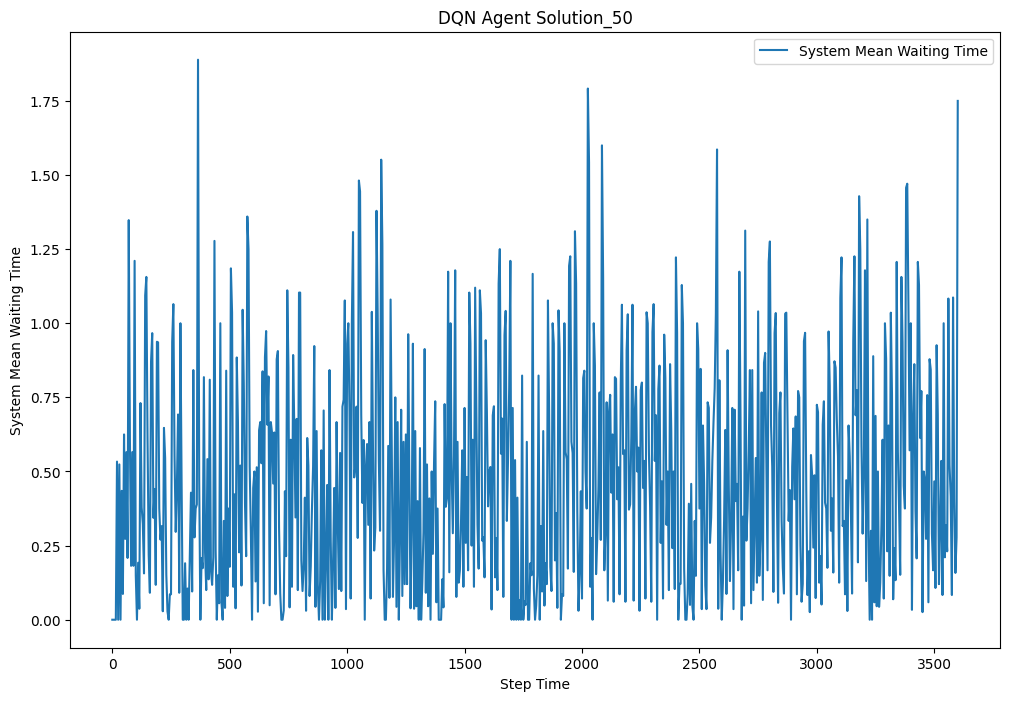

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_metrics(file_path, title):
    data = pd.read_csv(file_path)
    print("Columns in the CSV:", data.columns)
    
    if 'step' not in data.columns or 'system_mean_waiting_time' not in data.columns:
        raise KeyError("CSV file does not contain required columns: 'step' and 'system_mean_waiting_time'")
    
    plt.figure(figsize=(12, 8))
    plt.plot(data['step'], data['system_mean_waiting_time'], label='System Mean Waiting Time')
    plt.xlabel('Step Time')
    plt.ylabel('System Mean Waiting Time')
    plt.title(title)
    plt.legend()
    plt.show()

def visualize_results():
    # Naive solution
    # plot_metrics("outputs/2way-single-intersection/naive.csv", "Naive Fixed-Time Solution")

    # DQN agent solution
    plot_metrics("/Users/eviat/Desktop/SUMO/outputs/single-intersection/dqn_20240603_192928.csv_conn0_ep20.csv", "DQN Agent Solution_1")
    plot_metrics("/Users/eviat/Desktop/SUMO/outputs/single-intersection/dqn_20240603_192928.csv_conn0_ep50.csv", "DQN Agent Solution_50")

if __name__ == "__main__":
    visualize_results()


# Run the trained DQN agent and visualize the results


In [ ]:
if __name__ == "__main__":
    print("Connecting to SUMO server...")
    traci_connection = traci.connect(port=65533)
    print("Connected to SUMO server")

    env = SumoEnvironment(
        net_file="/Users/md/Desktop/sumo-rl/nets/single-intersection/single-intersection.net.xml",
        route_file="/Users/md/Desktop/sumo-rl/nets/single-intersection/single-intersection.rou.xml",
        out_csv_name="outputs/2way-single-intersection/dqn",
        single_agent=True,
        use_gui=True,
        num_seconds=3600,
        max_depart_delay=0)
    
    model = DQN.load("path_to_trained_model.zip")

    obs = env.reset()
    for _ in range(env.simulation_steps):
        action, _ = model.predict(obs)
        obs, rewards, dones, info = env.step(action)

    visualize_results()

# Creating and Exporting Videos

In [14]:
def create_video(output_path, title):
    import imageio
    from IPython.display import Video

    images = []
    for file_name in sorted(os.listdir(output_path)):
        if file_name.endswith(".png"):
            file_path = os.path.join(output_path, file_name)
            images.append(imageio.imread(file_path))
    imageio.mimsave(f'{title}.mp4', images, fps=10)
    return Video(f'{title}.mp4')

if __name__ == "__main__":
    create_video("outputs/2way-single-intersection/naive_images", "Naive Solution")
    create_video("outputs/2way-single-intersection/dqn_images", "DQN Agent Solution")


FileNotFoundError: [Errno 2] No such file or directory: 'outputs/2way-single-intersection/naive_images'